In [ ]:
!pip install swifter

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.metrics import classification_report
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from collections import Counter

In [ ]:
def evaluation(df: pd.DataFrame, y_col: str="chatgpt_final"):
    results = classification_report(df["annotation"], df[y_col], output_dict=True)
    tweeteval_result = results['macro avg']['recall']
    return tweeteval_result, results

In [ ]:
#FILENAME = "Ewaluacja ChatGPT - zadania - TweetEval - sentiment.csv" # file csv from google sheet

## GPT

In [ ]:
#df = pd.read_csv(FILENAME)
df = pd.read_excel('ChatGPT Evaluation v2.0.xlsx', sheet_name='21.TweetEmoji')
df

,id,annotation,text,prompt,chatgpt_final,chatgpt_raw,comment
0,0,1,@user @user what do these '1/2 naked pics' hav...,\nDescribe the sentiment of the given text. Ch...,0,0,NaN
1,1,1,OH: “I had a blue penis while I was this” [pla...,\nDescribe the sentiment of the given text. Ch...,0,0,NaN
2,2,1,"@user @user That's coming, but I think the vic...",\nDescribe the sentiment of the given text. Ch...,0,0,NaN
3,3,2,I think I may be finally in with the in crowd ...,\nDescribe the sentiment of the given text. Ch...,2,2,NaN
4,4,0,"@user Wow,first Hugo Chavez and now Fidel Cast...",\nDescribe the sentiment of the given text. Ch...,0,0 (negative),NaN
...,...,...,...,...,...,...,...
5138,10849,2,David Blaine Beyond Magic GREATEST TRICKS EXPO...,\nDescribe the sentiment of the given text. Ch...,1,1,NaN
5139,10850,0,"And so privatisation takes root, and begins to...",\nDescribe the sentiment of the given text. Ch...,0,0,NaN
5140,10851,1,Senior hurriyat leaders Ali Geelani Mirwaiz Um...,\nDescribe the sentiment of the given text. Ch...,1,1,NaN
5141,10852,2,@user @user I'd prefer Ashley Graham if we're ...,\nDescribe the sentiment of the given text. Ch...,1,1,NaN


In [ ]:
df[df.chatgpt_raw.str.contains(r'[A-Za-z]')]

,id,annotation,text,prompt,chatgpt_final,chatgpt_raw,comment
4,4,0,"@user Wow,first Hugo Chavez and now Fidel Cast...",\nDescribe the sentiment of the given text. Ch...,0,0 (negative),NaN
5,5,1,Savchenko now Saakashvili took drug test live ...,\nDescribe the sentiment of the given text. Ch...,0,0 (negative),NaN
6,6,1,How many more days until opening day? 😩,\nDescribe the sentiment of the given text. Ch...,1,1 (neutral),NaN
7,7,2,Twitter's #ThankYouObama Shows Heartfelt Grati...,\nDescribe the sentiment of the given text. Ch...,2,2 (positive),NaN
8,8,1,All CSG and Fracking all around Australia is t...,\nDescribe the sentiment of the given text. Ch...,0,0 (negative),NaN
...,...,...,...,...,...,...,...
5033,10744,1,#Вата reports this week #Egypt send his fighte...,\nDescribe the sentiment of the given text. Ch...,0,Negative 0,NaN
5034,10745,2,I liked a @user video Medical Marijuana: Seizu...,\nDescribe the sentiment of the given text. Ch...,2,Positive 2,NaN
5035,10746,0,@user @user @user If you lower your minimum wa...,\nDescribe the sentiment of the given text. Ch...,0,Negative 0,NaN
5036,10747,2,10 products that make samsung a top mobile dev...,\nDescribe the sentiment of the given text. Ch...,1,Neutral 1,NaN


In [ ]:
entropy(list(Counter(df.annotation).values())) # dataset entropy

1.0337578264709495

In [ ]:
result, results = evaluation(df)

In [ ]:
print(f"Average of recall for against and favor classes: {result}")

Average of recall for against and favor classes: 0.6845967265219425


In [ ]:
pd.DataFrame(results).T

,precision,recall,f1-score,support
0,0.577560,0.921321,0.710021,1665.000000
1,0.776480,0.400885,0.528772,2487.000000
2,0.602660,0.731584,0.660893,991.000000
accuracy,0.633094,0.633094,0.633094,0.633094
macro avg,0.652233,0.684597,0.633229,5143.000000
weighted avg,0.678588,0.633094,0.612908,5143.000000


## SOTA

In [ ]:
SOTA_FILENAME_ROBERTA = "RobertaBase-sentiment.csv"  # generated from tweeteval stance sota notebook
SOTA_FILENAME_TIME = "Timelms-sentiment.csv"  # generated from tweeteval stance sota notebook

In [ ]:
sota_rob_df = pd.read_csv(SOTA_FILENAME_ROBERTA)
sota_rob_df

,text,roberta,confidence,annotation,roberta_final
0,@user @user what do these '1/2 naked pics' hav...,negative,0.632360,1,0
1,OH: “I had a blue penis while I was this” [pla...,neutral,0.725450,1,1
2,"@user @user That's coming, but I think the vic...",negative,0.592008,1,0
3,I think I may be finally in with the in crowd ...,positive,0.787191,2,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",neutral,0.493880,0,1
...,...,...,...,...,...
5138,David Blaine Beyond Magic GREATEST TRICKS EXPO...,positive,0.870252,2,2
5139,"And so privatisation takes root, and begins to...",negative,0.950775,0,0
5140,Senior hurriyat leaders Ali Geelani Mirwaiz Um...,neutral,0.846869,1,1
5141,@user @user I'd prefer Ashley Graham if we're ...,neutral,0.709980,2,1


In [ ]:
sota_time_df = pd.read_csv(SOTA_FILENAME_TIME)
sota_time_df

,text,roberta,confidence,annotation,roberta_final
0,@user @user what do these '1/2 naked pics' hav...,negative,0.804726,1,0
1,OH: “I had a blue penis while I was this” [pla...,neutral,0.866949,1,1
2,"@user @user That's coming, but I think the vic...",neutral,0.763724,1,1
3,I think I may be finally in with the in crowd ...,positive,0.774047,2,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",neutral,0.416397,0,1
...,...,...,...,...,...
5138,David Blaine Beyond Magic GREATEST TRICKS EXPO...,positive,0.876698,2,2
5139,"And so privatisation takes root, and begins to...",negative,0.941841,0,0
5140,Senior hurriyat leaders Ali Geelani Mirwaiz Um...,neutral,0.916536,1,1
5141,@user @user I'd prefer Ashley Graham if we're ...,neutral,0.735311,2,1


In [ ]:
print(f"Average of recall for against and favor classes: {evaluation(sota_time_df, y_col='roberta_final')[0]}")

Average of recall for against and favor classes: 0.7302677726263216


In [ ]:
print(f"Average of recall for against and favor classes: {evaluation(sota_rob_df, y_col='roberta_final')[0]}")

Average of recall for against and favor classes: 0.7236365838693909


In [ ]:
compare_results = {
    "recall": [
        evaluation(df)[0], 
        evaluation(sota_rob_df, y_col="roberta_final")[0],
        evaluation(sota_time_df, y_col="roberta_final")[0]
    ],
    "model": ["ChatGPT", "RoBERTa", "TimeLMS"]
} 

In [ ]:
results_df = pd.DataFrame(compare_results)

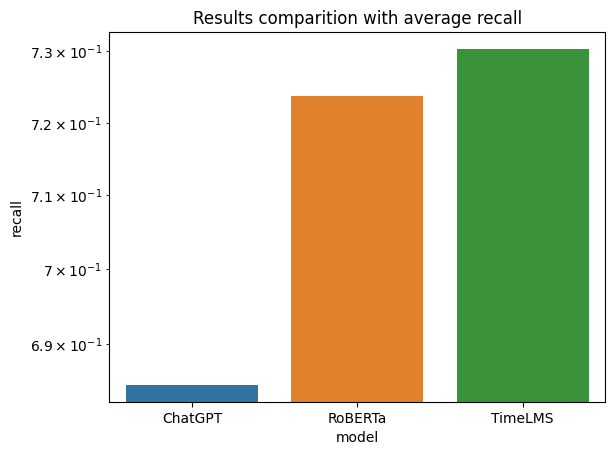

In [ ]:
sns.barplot(data=results_df, x="model", y="recall").set(title='Results comparition with average recall')
plt.yscale('log')